In [1]:
import pandas as pd

In [2]:
import pyfolio as pf

In [3]:
%load_ext zipline

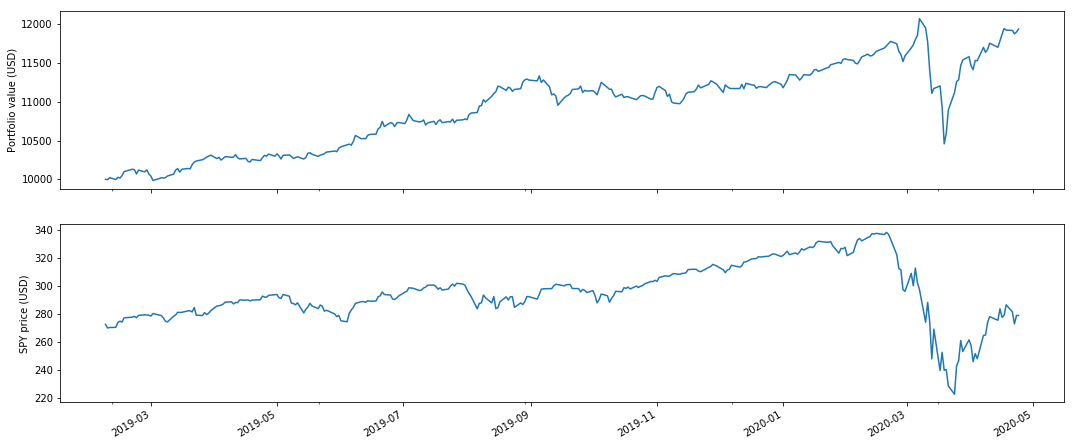

,SPY,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2019-02-06 21:00:00+00:00,272.739,NaN,0.000000,NaN,-0.001318,NaN,NaN,0.000000,10000.000000,0.000,...,0.0,0.0,0,NaN,10000.000000,0.000,0.000,1,[],0.0
2019-02-07 21:00:00+00:00,270.140,0.005552,-0.000495,0.020001,-0.010838,0.092208,0.060206,-9674.309682,325.690318,9669.364,...,0.0,0.0,0,-11.224972,10000.000000,0.000,0.000,2,"[{'sid': Equity(0 [GLD]), 'commission': None, ...",0.0
2019-02-08 21:00:00+00:00,270.470,0.026552,0.002122,0.366888,-0.009630,0.089233,0.233064,0.000000,325.690318,9695.531,...,0.0,0.0,0,39.350541,325.690318,9669.364,9669.364,3,[],0.0
2019-02-11 21:00:00+00:00,270.619,0.033139,-0.000333,0.024453,-0.009081,0.078747,0.078746,0.000000,325.690318,9670.980,...,0.0,0.0,0,-1.036805,325.690318,9695.531,9695.531,4,[],0.0
2019-02-12 21:00:00+00:00,274.100,0.035444,0.002514,0.096456,0.003662,0.127222,0.160647,0.000000,325.690318,9699.453,...,0.0,0.0,0,7.163069,325.690318,9670.980,9670.980,5,[],0.0
2019-02-13 21:00:00+00:00,274.989,0.032897,0.001661,0.026817,0.006920,0.114929,0.146745,0.000000,325.690318,9690.917,...,0.0,0.0,0,4.099745,325.690318,9699.453,9699.453,6,[],0.0
2019-02-14 21:00:00+00:00,274.380,0.034063,0.004623,0.147067,0.004687,0.106869,0.112797,0.000000,325.690318,9720.544,...,0.0,0.0,0,10.516910,325.690318,9690.917,9690.917,7,[],0.0
2019-02-15 21:00:00+00:00,277.369,0.040853,0.009936,0.214231,0.015635,0.114337,0.198294,0.000000,325.690318,9773.670,...,0.0,0.0,0,21.078360,325.690318,9720.544,9720.544,8,[],0.0
2019-02-19 21:00:00+00:00,277.850,0.039406,0.013023,0.266935,0.017393,0.106960,0.197230,0.000000,325.690318,9804.544,...,0.0,0.0,0,25.999361,325.690318,9773.670,9773.670,9,[],0.0
2019-02-20 21:00:00+00:00,278.410,0.038421,0.012508,0.217578,0.019443,0.100843,0.196852,0.000000,325.690318,9799.386,...,0.0,0.0,0,23.268421,325.690318,9804.544,9804.544,10,[],0.0


In [4]:
%%zipline -b yahoo_csv_bundle_allweather_us --start 2019-2-6 --end 2020-4-23 --capital-base 10000



# Put any initialization logic here.  The context object will be passed to
# the other methods in your algorithm.
from zipline.api import order, record, symbol, order_percent, order_target_percent, get_datetime
from zipline.finance import commission, slippage
import logbook
log = logbook.Logger(__name__)
def initialize(context):
    context.stock = symbol('SPY')
    context.long_bond = symbol('TLT')
    context.mid_bond = symbol('IEF')
    context.gold = symbol('GLD')
    context.commodity = symbol('DBC')
    
    context.stock_position = 0.30
    context.long_bond_position = 0.40
    context.mid_bond_position = 0.15
    context.gold_position = 0.075
    context.commodity_position = 0.075
    
    #context.stock_position = 1
    #context.long_bond_position = 0
    #context.mid_bond_position = 0
    #context.gold_position = 0
    #context.commodity_position = 0
    
    context.rebalance_inteval = 365
    context.rebalance_date = 0
    context.fired = False
    
def rebalance(context, data):
    values = context.portfolio.portfolio_value
    log.info("portfolio value:  " + str(values))
    order_percent(context.stock,0)
    order_percent(context.long_bond,0)
    order_percent(context.mid_bond,0)
    order_percent(context.gold,0)
    order_percent(context.commodity,0)
    
    
    order_target_percent(context.stock,context.stock_position)
    order_target_percent(context.long_bond, context.long_bond_position)
    order_target_percent(context.mid_bond, context.mid_bond_position)
    order_target_percent(context.gold,context.gold_position)
    order_target_percent(context.commodity, context.commodity_position)
    
    
    
# Will be called on every trade event for the securities you specify. 
def handle_data(context, data):
    # Implement your algorithm logic here.
 
    # data[sid(X)] holds the trade event data for that security.
    # context.portfolio holds the current portfolio state.
 
    # Place orders with the order(SID, amount) method.
 
    # TODO: implement your own logic here.
    
    record(SPY=data.current(context.stock, 'price'))
    if not context.fired:
        order_target_percent(context.stock,context.stock_position)
        order_target_percent(context.long_bond, context.long_bond_position)
        order_target_percent(context.mid_bond, context.mid_bond_position)
        order_target_percent(context.gold, context.gold_position)
        order_target_percent(context.commodity, context.commodity_position)
        context.rebalance_date = get_datetime()
        log.info("build portfolio at " + str(context.rebalance_date))
        log.info("portfolio value:  " + str(context.portfolio.portfolio_value  ))
        #log.info("build portfolio at " + str(context.rebalance_date))
        context.fired = True
    else:
        now = get_datetime()
        if (now.year > context.rebalance_date.year):
            log.info("new year arrivied:" + str(now))
            
            context.rebalance_date = now
            rebalance(context, data)

def analyze(context=None, results=None):
    import matplotlib.pyplot as plt
    # Plot the portfolio and asset data.
    ax1 = plt.subplot(211)
    results.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('Portfolio value (USD)')
    ax2 = plt.subplot(212, sharex=ax1)
    results.SPY.plot(ax=ax2)
    ax2.set_ylabel('SPY price (USD)')

    # Show the plot.
    plt.gcf().set_size_inches(18, 8)
    plt.show()



























    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    



In [6]:
_.head()

AttributeError: 'str' object has no attribute 'head'

In [5]:
_.head()

,SPY,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2015-01-22 21:00:00+00:00,206.10,NaN,0.000000,None,0.0,NaN,None,0.00000,10000.00000,0.00,...,0.0,0.0,0,NaN,10000.00000,0.00,0.00,1,[],0.0
2015-01-23 21:00:00+00:00,204.97,0.005561,-0.000495,None,0.0,0.0,None,-9702.37371,297.62629,9697.42,...,0.0,0.0,0,-11.224972,10000.00000,0.00,0.00,2,"[{'amount': 14, 'dt': 2015-01-23 21:00:00+00:0...",0.0
2015-01-26 21:00:00+00:00,205.45,0.014424,-0.002256,None,0.0,0.0,None,0.00000,297.62629,9679.81,...,0.0,0.0,0,-11.303746,297.62629,9697.42,9697.42,3,[],0.0
2015-01-27 21:00:00+00:00,202.74,0.014798,-0.004133,None,0.0,0.0,None,0.00000,297.62629,9661.04,...,0.0,0.0,0,-12.515389,297.62629,9679.81,9679.81,4,[],0.0
2015-01-28 21:00:00+00:00,200.14,0.028159,-0.001646,None,0.0,0.0,None,0.00000,297.62629,9685.91,...,0.0,0.0,0,-4.439153,297.62629,9661.04,9661.04,5,[],0.0


In [9]:
stock_rets = pf.utils.get_symbol_rets('SPW')

SystemError: <class 'str'> returned a result with an error set

In [6]:
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(results)

In [10]:
returns.head()


2007-01-22 00:00:00+00:00    0.000000
2007-01-23 00:00:00+00:00   -0.000507
2007-01-24 00:00:00+00:00    0.001857
2007-01-25 00:00:00+00:00   -0.007919
2007-01-26 00:00:00+00:00    0.000448
Name: returns, dtype: float64

In [13]:
_

2015-01-22 00:00:00+00:00    0.000000
2015-01-23 00:00:00+00:00   -0.000495
2015-01-26 00:00:00+00:00   -0.001762
2015-01-27 00:00:00+00:00   -0.001881
2015-01-28 00:00:00+00:00    0.002497
Freq: B, Name: returns, dtype: float64

In [5]:
results =_

In [6]:
results

,SPY,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2015-01-22 21:00:00+00:00,206.100,NaN,0.000000,NaN,-3.043273e-01,NaN,NaN,0.000000,10000.000000,0.000,...,0.0,0.0,0,NaN,10000.000000,0.000,0.000,1,[],0.0
2015-01-23 21:00:00+00:00,204.970,0.005561,-0.000495,-0.127124,-3.081415e-01,3.354521,-0.001658,-9702.360703,297.639296,9697.407,...,0.0,0.0,0,-11.224972,10000.000000,0.000,0.000,2,"[{'sid': Equity(0 [DBC]), 'amount': 43, 'commi...",0.0
2015-01-26 21:00:00+00:00,205.449,0.014441,-0.002258,-0.288177,-3.065213e-01,2.775507,-0.003810,0.000000,297.639296,9679.778,...,0.0,0.0,0,-11.301963,297.639296,9697.407,9697.407,3,[],0.0
2015-01-27 21:00:00+00:00,202.740,0.014797,-0.004133,-0.353543,-3.156687e-01,2.374448,-0.004595,0.000000,297.639296,9661.027,...,0.0,0.0,0,-12.515793,297.639296,9679.778,9679.778,4,[],0.0
2015-01-28 21:00:00+00:00,200.139,0.028155,-0.001647,-0.110813,-3.244448e-01,2.111174,-0.001670,0.000000,297.639296,9685.891,...,0.0,0.0,0,-4.440926,297.639296,9661.027,9661.027,5,[],0.0
2015-01-29 21:00:00+00:00,201.990,0.028231,-0.003940,-0.209189,-3.182002e-01,1.951372,-0.003213,0.000000,297.639296,9662.957,...,0.0,0.0,0,-7.318875,297.639296,9685.891,9685.891,6,[],0.0
2015-01-30 21:00:00+00:00,199.449,0.058310,0.004089,0.158962,-3.267738e-01,1.798641,0.000871,0.000000,297.639296,9743.251,...,0.0,0.0,0,7.091215,297.639296,9662.957,9662.957,7,[],0.0
2015-02-02 21:00:00+00:00,201.919,0.054076,0.005244,0.178405,-3.184365e-01,1.699485,0.001207,0.000000,297.639296,9754.798,...,0.0,0.0,0,8.483733,297.639296,9743.251,9743.251,8,[],0.0
2015-02-03 21:00:00+00:00,204.839,0.057237,0.000818,0.008579,-3.085803e-01,1.616157,-0.001818,0.000000,297.639296,9710.543,...,0.0,0.0,0,0.819446,297.639296,9754.798,9754.798,9,[],0.0
2015-02-04 21:00:00+00:00,204.059,0.054645,-0.000800,-0.037527,-3.112132e-01,1.531468,-0.002363,0.000000,297.639296,9694.356,...,0.0,0.0,0,-0.642073,297.639296,9710.543,9710.543,10,[],0.0


In [17]:
pf.create_returns_tear_sheet(returns, live_start_date='2015-01-22')

SystemError: <class 'str'> returned a result with an error set

In [19]:
positions

sid,Equity(0 [GLD]),Equity(1 [DBC]),Equity(2 [IEF]),Equity(3 [TLT]),Equity(4 [SPY]),cash
index,,,,,,
2015-01-23 00:00:00+00:00,621.15,743.47,1420.12,4043.1,2869.58,297.62629
2015-01-26 00:00:00+00:00,614.95,740.89,1416.87,4030.8,2876.30,297.62629
2015-01-27 00:00:00+00:00,622.00,744.76,1418.82,4037.1,2838.36,297.62629
2015-01-28 00:00:00+00:00,617.10,734.01,1429.74,4103.1,2801.96,297.62629


In [21]:
results

,SPY,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2015-01-22 00:00:00+00:00,206.10,NaN,0.000000,None,0.0,NaN,None,0.00000,10000.00000,0.00,...,0.0,0.0,0,NaN,10000.00000,0.00,0.00,1,[],0.0
2015-01-23 00:00:00+00:00,204.97,0.005561,-0.000495,None,0.0,0.0,None,-9702.37371,297.62629,9697.42,...,0.0,0.0,0,-11.224972,10000.00000,0.00,0.00,2,"[{'amount': 14, 'dt': 2015-01-23 21:00:00+00:0...",0.0
2015-01-26 00:00:00+00:00,205.45,0.014424,-0.002256,None,0.0,0.0,None,0.00000,297.62629,9679.81,...,0.0,0.0,0,-11.303746,297.62629,9697.42,9697.42,3,[],0.0
2015-01-27 00:00:00+00:00,202.74,0.014798,-0.004133,None,0.0,0.0,None,0.00000,297.62629,9661.04,...,0.0,0.0,0,-12.515389,297.62629,9679.81,9679.81,4,[],0.0
2015-01-28 00:00:00+00:00,200.14,0.028159,-0.001646,None,0.0,0.0,None,0.00000,297.62629,9685.91,...,0.0,0.0,0,-4.439153,297.62629,9661.04,9661.04,5,[],0.0
2015-01-29 00:00:00+00:00,201.99,0.028227,-0.003937,None,0.0,0.0,None,0.00000,297.62629,9663.00,...,0.0,0.0,0,-7.316475,297.62629,9685.91,9685.91,6,[],0.0
2015-01-30 00:00:00+00:00,199.45,0.058309,0.004093,None,0.0,0.0,None,0.00000,297.62629,9743.30,...,0.0,0.0,0,7.100476,297.62629,9663.00,9663.00,7,[],0.0
2015-02-02 00:00:00+00:00,201.92,0.054077,0.005252,None,0.0,0.0,None,0.00000,297.62629,9754.89,...,0.0,0.0,0,8.500091,297.62629,9743.30,9743.30,8,[],0.0
2015-02-03 00:00:00+00:00,204.84,0.057248,0.000823,None,0.0,0.0,None,0.00000,297.62629,9710.60,...,0.0,0.0,0,0.823349,297.62629,9754.89,9754.89,9,[],0.0
2015-02-04 00:00:00+00:00,204.06,0.054659,-0.000800,None,0.0,0.0,None,0.00000,297.62629,9694.37,...,0.0,0.0,0,-0.641648,297.62629,9710.60,9710.60,10,[],0.0


In [6]:
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(results)

In [8]:
returns


2007-01-03 00:00:00+00:00    0.000000
2007-01-04 00:00:00+00:00   -0.000502
2007-01-05 00:00:00+00:00   -0.006582
2007-01-08 00:00:00+00:00    0.002946
2007-01-09 00:00:00+00:00   -0.000462
2007-01-10 00:00:00+00:00   -0.002403
2007-01-11 00:00:00+00:00   -0.001441
2007-01-12 00:00:00+00:00    0.003685
2007-01-16 00:00:00+00:00   -0.001354
2007-01-17 00:00:00+00:00    0.000071
2007-01-18 00:00:00+00:00   -0.000825
2007-01-19 00:00:00+00:00    0.001246
2007-01-22 00:00:00+00:00   -0.000007
2007-01-23 00:00:00+00:00    0.001994
2007-01-24 00:00:00+00:00    0.001894
2007-01-25 00:00:00+00:00   -0.007887
2007-01-26 00:00:00+00:00    0.000438
2007-01-29 00:00:00+00:00   -0.003107
2007-01-30 00:00:00+00:00    0.004716
2007-01-31 00:00:00+00:00    0.007335
2007-02-01 00:00:00+00:00   -0.000701
2007-02-02 00:00:00+00:00    0.000858
2007-02-05 00:00:00+00:00    0.000570
2007-02-06 00:00:00+00:00    0.002813
2007-02-07 00:00:00+00:00    0.001039
2007-02-08 00:00:00+00:00    0.002711
2007-02-09 0

In [ ]:
pf.create_returns_tear_sheet(returns, live_start_date='2008-01-22')

In [1]:
pf.create_full_tear_sheet(returns, positions, transactions, slippage=0, round_trips=True)

NameError: name 'pf' is not defined

In [8]:
results

,SPY,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2019-02-06 00:00:00+00:00,272.739,NaN,0.000000,NaN,-0.001318,NaN,NaN,0.000000,10000.000000,0.000,...,0.0,0.0,0,NaN,10000.000000,0.000,0.000,1,[],0.0
2019-02-07 00:00:00+00:00,270.140,0.005552,-0.000495,0.020001,-0.010838,0.092208,0.060206,-9674.309682,325.690318,9669.364,...,0.0,0.0,0,-11.224972,10000.000000,0.000,0.000,2,"[{'sid': Equity(0 [GLD]), 'commission': None, ...",0.0
2019-02-08 00:00:00+00:00,270.470,0.026552,0.002122,0.366888,-0.009630,0.089233,0.233064,0.000000,325.690318,9695.531,...,0.0,0.0,0,39.350541,325.690318,9669.364,9669.364,3,[],0.0
2019-02-11 00:00:00+00:00,270.619,0.033139,-0.000333,0.024453,-0.009081,0.078747,0.078746,0.000000,325.690318,9670.980,...,0.0,0.0,0,-1.036805,325.690318,9695.531,9695.531,4,[],0.0
2019-02-12 00:00:00+00:00,274.100,0.035444,0.002514,0.096456,0.003662,0.127222,0.160647,0.000000,325.690318,9699.453,...,0.0,0.0,0,7.163069,325.690318,9670.980,9670.980,5,[],0.0
2019-02-13 00:00:00+00:00,274.989,0.032897,0.001661,0.026817,0.006920,0.114929,0.146745,0.000000,325.690318,9690.917,...,0.0,0.0,0,4.099745,325.690318,9699.453,9699.453,6,[],0.0
2019-02-14 00:00:00+00:00,274.380,0.034063,0.004623,0.147067,0.004687,0.106869,0.112797,0.000000,325.690318,9720.544,...,0.0,0.0,0,10.516910,325.690318,9690.917,9690.917,7,[],0.0
2019-02-15 00:00:00+00:00,277.369,0.040853,0.009936,0.214231,0.015635,0.114337,0.198294,0.000000,325.690318,9773.670,...,0.0,0.0,0,21.078360,325.690318,9720.544,9720.544,8,[],0.0
2019-02-19 00:00:00+00:00,277.850,0.039406,0.013023,0.266935,0.017393,0.106960,0.197230,0.000000,325.690318,9804.544,...,0.0,0.0,0,25.999361,325.690318,9773.670,9773.670,9,[],0.0
2019-02-20 00:00:00+00:00,278.410,0.038421,0.012508,0.217578,0.019443,0.100843,0.196852,0.000000,325.690318,9799.386,...,0.0,0.0,0,23.268421,325.690318,9804.544,9804.544,10,[],0.0
